# UNIST MGE303 Data Mining
## Lab Session 01 | 2020-04-20 (MON)
### Seok-Ju Hahn (sjhahn11512@unist.ac.kr)



## Supervised Learning (Regression): House Price Prediction

### Preparation
- Load packages using `import` command and alias command (`as`)
- Remember trio: numpy, pandas, matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data Munging
* <a href='#Load-data'>Load data</a>
* <a href='#Handle-data'>Handle data</a>
* <a href='#Split-training-and-test-data'>Split training and test data</a>

#### Load data
* Load data using `read_csv()` method
  - Pandas package read data as `DataFrame` attribute

In [2]:
df = pd.read_csv('./housing.csv')

* Check the first few rows of data using `head()` method

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### Handle data
* Get some parts of data using `iloc[row_index, column_index]` and `loc[row_index_name, column_name]` methods
  - `:` means 'all'
  - Attaching `.values` returns numpy array, if not it reutrns `pd.Series` attribute

In [4]:
"""
- Get the first column of data
"""
print(df.loc[:,'longitude']) # for column name
df.iloc[:,0]  # for column index

0       -122.23
1       -122.22
2       -122.24
3       -122.25
4       -122.25
          ...  
20635   -121.09
20636   -121.21
20637   -121.22
20638   -121.32
20639   -121.24
Name: longitude, Length: 20640, dtype: float64


0       -122.23
1       -122.22
2       -122.24
3       -122.25
4       -122.25
          ...  
20635   -121.09
20636   -121.21
20637   -121.22
20638   -121.32
20639   -121.24
Name: longitude, Length: 20640, dtype: float64

In [5]:
"""
- Get the first column of data attaching `.values`
= CAUTION: in Python, index strats at 0
"""
df.iloc[:,0].values

array([-122.23, -122.22, -122.24, ..., -121.22, -121.32, -121.24])

In [6]:
"""
- Get the 11th data of 'total_rooms' feature 
"""
df.loc[10, 'total_rooms']

2202.0

* You can refer a specific column using `[]` notation or `.column_name` notation

In [7]:
"""
- Get the 'latitude' column
"""
print(df.latitude)
df['latitude']

0        37.88
1        37.86
2        37.85
3        37.85
4        37.85
         ...  
20635    39.48
20636    39.49
20637    39.43
20638    39.43
20639    39.37
Name: latitude, Length: 20640, dtype: float64


0        37.88
1        37.86
2        37.85
3        37.85
4        37.85
         ...  
20635    39.48
20636    39.49
20637    39.43
20638    39.43
20639    39.37
Name: latitude, Length: 20640, dtype: float64

* Check simple description of data using `info()` method
  - Column name
  - Column/Row counts
  - Data types
  - Counts of non-null samples

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


* Check a categorical feature using `value_counts()` method

In [9]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

* Check summarized information of numerical features using `describe()` method

In [10]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


* Plot histogram of each column to check sanity of the data
  - Attach `hist()` method to your dataframe

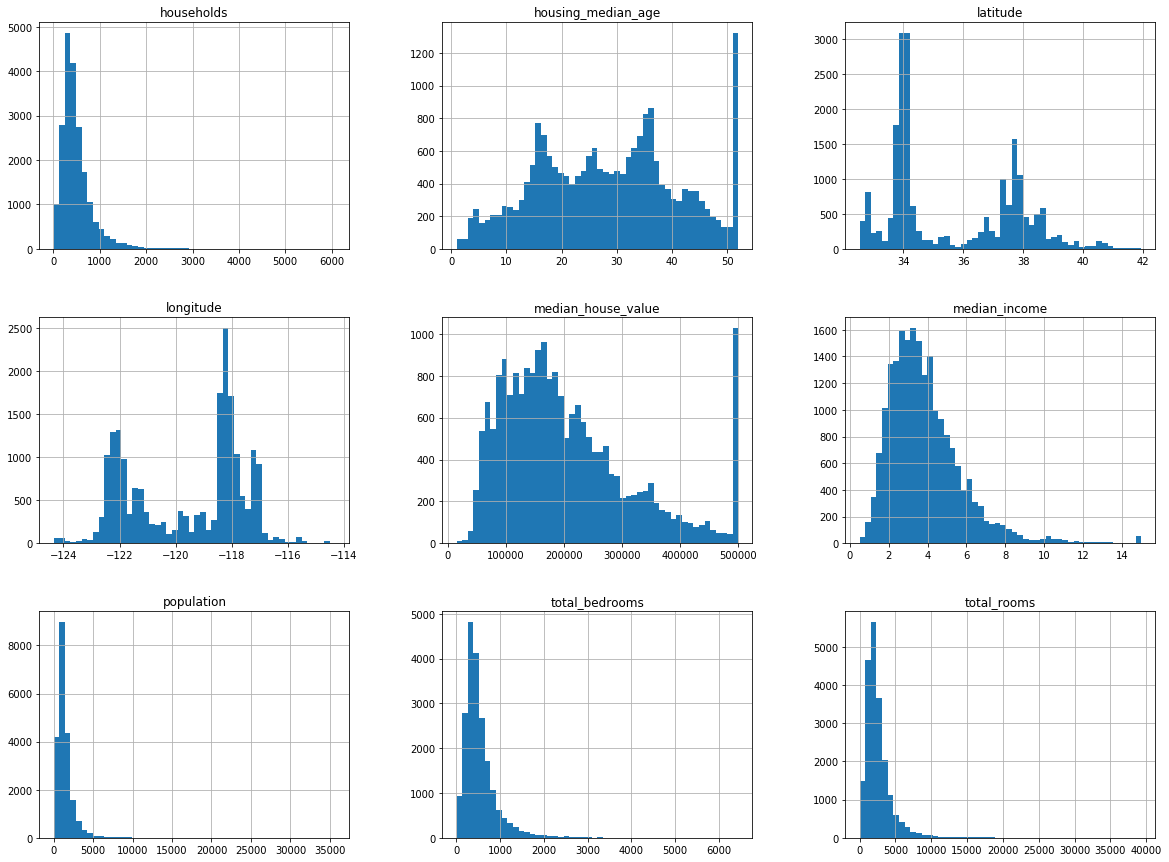

In [11]:
df.hist(bins=50, figsize=(20,15))
plt.show()

##### What things can you find in the above histograms?
- 'median_income(중위 소득)' variable is not represented in dollar. (See horizontal axis)
- Maximum values of 'housing_median_age(중위 주택 연도)' and 'median_house_value(중위 주택 가격)' variables are strange.
  - It is intentionally set to be limited by data collector.
  - So, you don't have to care, but for other dataset, you should detect and ask this kinds of facts to data engineers.
- Scales (value range) of predictors are different from each other.
  - It is to be handled in data pre-processing stage.

#### Split training and test data
- Remember, you **MUST** split test data first for simulating unseen data
- Use `train_test_split()` method in scikit-learn package
- If you use test set on training your models, it underestimates generalization error, which induces __data snooping bias__.

In [13]:
# import method
from sklearn.model_selection import train_test_split

In [14]:
# set `random_state` for reproduciblity
training_set, test_set = train_test_split(df, test_size=0.2, random_state=123)

- Check sample counts of training and test set using `len()` method

In [15]:
TR_LENGTH = len(training_set)
TE_LENGTH = len(test_set)

print(f'Training samples: {TR_LENGTH}, Test samples: {TE_LENGTH}')

Training samples: 16512, Test samples: 4128


### Exploratory Data Analysis (EDA)

In [16]:
# copy data for preventing damage in raw training data
data = training_set.copy()

* Plot scatter-plot of your training data for indicating house location
  - Attach `plot(kind='scatter', x='', y='')` method to your dataframe
  - You can add `alpha` argument for effective representation of scatter density

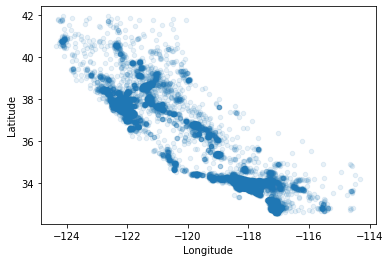

In [21]:
ax = data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)
ax.set(xlabel='Longitude', ylabel='Latitude')
plt.show()

* Calculate Pearson's r correlation coefficient among predictors
  - Attach `corr()` method to dataframe

In [22]:
correlation_matrix = data.corr()
correlation_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924720,-0.107313,0.050710,0.073164,0.103523,0.059470,-0.011739,-0.038349
latitude,-0.924720,1.000000,0.010405,-0.042307,-0.071123,-0.112544,-0.075068,-0.083397,-0.150574
housing_median_age,-0.107313,0.010405,1.000000,-0.361528,-0.322509,-0.302180,-0.305194,-0.122520,0.099487
total_rooms,0.050710,-0.042307,-0.361528,1.000000,0.930047,0.865105,0.919424,0.198930,0.132965
total_bedrooms,0.073164,-0.071123,-0.322509,0.930047,1.000000,0.885922,0.981040,-0.006547,0.048823
population,0.103523,-0.112544,-0.302180,0.865105,0.885922,1.000000,0.913154,0.007101,-0.024484
households,0.059470,-0.075068,-0.305194,0.919424,0.981040,0.913154,1.000000,0.014042,0.064043
median_income,-0.011739,-0.083397,-0.122520,0.198930,-0.006547,0.007101,0.014042,1.000000,0.688904
median_house_value,-0.038349,-0.150574,0.099487,0.132965,0.048823,-0.024484,0.064043,0.688904,1.000000


* Inspect which variable is highly correlated with house value
  - Attach `sort_values(ascending=False)` method to correlation matrix you made, after referring the 'median_house_value' column

In [23]:
correlation_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688904
total_rooms           0.132965
housing_median_age    0.099487
households            0.064043
total_bedrooms        0.048823
population           -0.024484
longitude            -0.038349
latitude             -0.150574
Name: median_house_value, dtype: float64

* Seems like 'median_income' is highly correalted with house price
  - let us see scatter plot again

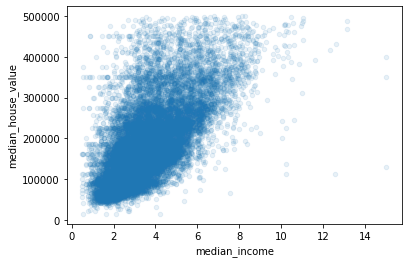

In [31]:
data.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)
plt.show()

* Yes, it seems better to remove the uppermost lines (due to intentional limit by data engineers).
* You can filter out samples to be remained by providing conditions in `[]` notation.

In [25]:
data = data[data['median_house_value'] < 500000]

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15724 entries, 9950 to 19966
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15724 non-null  float64
 1   latitude            15724 non-null  float64
 2   housing_median_age  15724 non-null  float64
 3   total_rooms         15724 non-null  float64
 4   total_bedrooms      15557 non-null  float64
 5   population          15724 non-null  float64
 6   households          15724 non-null  float64
 7   median_income       15724 non-null  float64
 8   median_house_value  15724 non-null  float64
 9   ocean_proximity     15724 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


* You can do more!
  - <u>Create new features</u> by combining existing predictors
  - This kind of work can strengthen our hypothesis (if it is done in a sophisticated manner) 

* For example, it is better to know the number of rooms per household rather than 'total_rooms'.
* Same logic can be applied for 'total_bedrooms' and 'population'
  - Let us make new features: 'rooms_per_household', 'bedrooms_per_room', 'people_per_household'

In [29]:
data['rooms_per_household'] = data['total_rooms'] / data['households']
data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']
data['people_per_household'] = data['population'] / data['households']

C:\Users\hyoungchan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\hyoungchan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\hyoungchan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [30]:
# Check correlation matrix again for additional features
correlation_matrix = data.corr()
correlation_matrix['median_house_value'].sort_values(ascending=False)

median_house_value      1.000000
median_income           0.645404
total_rooms             0.142400
rooms_per_household     0.109391
households              0.093210
total_bedrooms          0.073744
housing_median_age      0.064139
population              0.012836
people_per_household   -0.016991
longitude              -0.039916
latitude               -0.154356
bedrooms_per_room      -0.219666
Name: median_house_value, dtype: float64

### Data Pre-processing
* <a href='#Cleanse-data'>Cleanse data</a>
* <a href='#Scale-data'>Scale data</a>

#### Cleanse data
* Handle missing values
  - Just remove rows with missing values
  - Impute missing values using mean, median, or imputation algorithms (NOT covered today)
  - Collect data again
* Drop unncessary columns
* Remove duplicated samples
* Convert categorical data into numerical representation (encoding)

##### Handle missing values
- Remove rows with missing value
- Attach `dropna()` to the dataframe

In [32]:
# We have missing data in 'total_bedrooms' and 'bedrooms_per_room' features
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15724 entries, 9950 to 19966
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   longitude             15724 non-null  float64
 1   latitude              15724 non-null  float64
 2   housing_median_age    15724 non-null  float64
 3   total_rooms           15724 non-null  float64
 4   total_bedrooms        15557 non-null  float64
 5   population            15724 non-null  float64
 6   households            15724 non-null  float64
 7   median_income         15724 non-null  float64
 8   median_house_value    15724 non-null  float64
 9   ocean_proximity       15724 non-null  object 
 10  rooms_per_household   15724 non-null  float64
 11  bedrooms_per_room     15557 non-null  float64
 12  people_per_household  15724 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.7+ MB


In [33]:
data = data.dropna()

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15557 entries, 9950 to 19966
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   longitude             15557 non-null  float64
 1   latitude              15557 non-null  float64
 2   housing_median_age    15557 non-null  float64
 3   total_rooms           15557 non-null  float64
 4   total_bedrooms        15557 non-null  float64
 5   population            15557 non-null  float64
 6   households            15557 non-null  float64
 7   median_income         15557 non-null  float64
 8   median_house_value    15557 non-null  float64
 9   ocean_proximity       15557 non-null  object 
 10  rooms_per_household   15557 non-null  float64
 11  bedrooms_per_room     15557 non-null  float64
 12  people_per_household  15557 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.7+ MB


##### Drop unncessary columns
- As we made new features ('rooms_per_household', 'bedrooms_per_room', 'people_per_household'), let us remove features used for making three predictors
- Attach `drop(columns=['COLUMN_NAME'], axis=1)` to the dataframe

In [35]:
data = data.drop(columns=['total_rooms', 'total_bedrooms', 'population', 'households'], axis=1)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15557 entries, 9950 to 19966
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   longitude             15557 non-null  float64
 1   latitude              15557 non-null  float64
 2   housing_median_age    15557 non-null  float64
 3   median_income         15557 non-null  float64
 4   median_house_value    15557 non-null  float64
 5   ocean_proximity       15557 non-null  object 
 6   rooms_per_household   15557 non-null  float64
 7   bedrooms_per_room     15557 non-null  float64
 8   people_per_household  15557 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.2+ MB


In [37]:
data.shape

(15557, 9)

##### Drop duplicated samples
- Attach `drop_duplicates()` to the dataframe

In [38]:
data = data.drop_duplicates()
data.shape

(15557, 9)

#### (Advanced) Automation - <a href='#AddFeatures'>AddFeatures</a>
- This process can be automated by constructing a simple function
- Automation of such a process is important since data mining process requires fast prototyping and experiments

##### Encode cateogrical feature
- Convert categorical feature represented in string format into numerical representation ('ocean_proximity' feature)

In [39]:
# let us first separate numerical and categorical columns
cat_feat = ['ocean_proximity']
num_feat = ['longitude', 'latitude', 'housing_median_age', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'people_per_household']

- *Beware* that we at first need to split out the dependent variable first!
- Use `drop()` and `loc()` method!

In [40]:
X_train, y_train = data.drop(columns=['median_house_value'], axis=1, inplace=False), data.loc[:, ['median_house_value']]

- Use `OneHotEncoer` provided by Scikit-Learn package
- Select 'ocean_proximity' column only using `[]` or `.COLUMN_NAME` or `loc()` or `iloc()`, and call `fit_transform()` method to `OneHotEncoder`

In [41]:
from sklearn.preprocessing import OneHotEncoder

In [43]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(data['ocean_proximity'].values.reshape(-1, 1))
X_train_cat = encoder.transform(data['ocean_proximity'].values.reshape(-1, 1))

# OR
# X_train_cat = encoder.fit_transform(data['ocean_proximity'].values.reshape(-1, 1))

# CAUTION! for test set, you need to fit on training data first, and SHOULD only transform test set!
"""
example code snippet)
  encoder.fit(training_data)
  training_data = encoder.transform(training_data)
  test_data = encoder.transform(test_data)
"""

'\nexample code snippet)\n  encoder.fit(training_data)\n  training_data = encoder.transform(training_data)\n  test_data = encoder.transform(test_data)\n'

In [44]:
X_train_cat.shape

(15557, 5)

### Now, all data are transformed into numerical values!

#### Scale data
* Feature scaling means to transform ranges of all **numerical** features to be similar with each other. <br> (it is enough to just one-hot-encode categorical features)
* Standard scaling (standardization) is to make feature to have mean 0 and standard deviation 1.
  - It is **TOTALLY different** from converting data distribution to Gaussian ditsribution!!!
  - Except for models having assumption of Gaussian distributed data, such as Linear Discriminant analysis, Gaussian Mixture models, <br>
  it is NOT needed to convert data distribution to be Gaussian.
  - It is just shift the range of feature distribution
* Feature scaling is especially important for algorithms:
  - based on Euclidean distance like K-means clustering, k-NN (different scale distorts distance measure)
  - based on gradient-based optimizations like logistic regression, neural networks (different scales distorts loss surface)
  - regard scale of features with significance like PCA

##### Scale numerical features
- Scale numerical features to have mean 0 and standard deviation 1
- Use `StandardScaler` provided by Scikit-Learn package
- Select numerical feature columns and call `fit_trnasform()` method

In [45]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_train_num = scalar.fit_transform(X_train[num_feat].values)


In [46]:
X_train_num.shape

(15557, 7)

##### Finish up data pre-processing
- Now, we need to concatenate categorical (one-hot encoded) and numerical (standardized) features!
- It can be easily done by `np.concatenate([*arrays], axis=1)` method

In [47]:
X_train = np.concatenate([X_train_num, X_train_cat], axis=1)
X_train.shape

(15557, 12)

### Don't forget! You should do the same process above on the test set you made in <a href='#Split-training-and-test-data'>here</a>

#### (Advanced) Automation - <a href='#Pipeline'>Pipeline</a>
- This process can be also automated by using `Pipeline` and `ColumnTransformer` method 
- Automation of such a process is important since data mining process requires fast prototyping and experiments

### Model training and evaluation
* <a href='#Train-model'>Train model</a>
* <a href='#Evaluate-model'>Evaluate model</a>

#### Train model
* Choose an appropriate algorithm for your problem setting
* There are tons of ready-made algorithms in here: <a href='https://scikit-learn.org/stable/supervised_learning.html'>Scikit-Learn</a>

* To train model, we need to create model instance such as `LinearRegression()` and call `fit()` method by providing independent and dependent variables.

In [71]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* Performance of the trained model on the training set can easily be found by calling `score()` method (which returns r-squared) or calling another metrics like `mean_squared_error` with result from `predict()` method.

In [52]:
lin_reg.score(X_train, y_train)

0.5931035168136884

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred_train = lin_reg.predict(X_train)

lin_reg_mse = mean_squared_error(y_train, y_pred_train)
lin_reg_mae = mean_absolute_error(y_train, y_pred_train)

print(f'MAE: {lin_reg_mae:.4f}, MSE: {lin_reg_mse:.4f}, RMSE: {np.sqrt(lin_reg_mse):.4f}')

MAE: 45915.5816, MSE: 3853910386.4701, RMSE: 62079.8710


#### Evaluate model
* Internal evaluation
  - Evaluate the performance of the trained model using training data by simulating training-test split internally.
  - Bootstrapping (NOT covered), cross-validation
* External evaluation
  - Evaluate the performance of the trained model using unseen data (test set).

##### Internal evaluation
- Can be easily done by `cross_val_score()` method
- When passing argument `cv=10`, it executes 10-fold CV

In [54]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LinearRegression(), X_train, y_train, scoring='neg_mean_squared_error', cv=10)
lin_reg_rmse_cv_scores = np.sqrt(-scores)

In [55]:
print(f'Scores: {lin_reg_rmse_cv_scores},\nMean: {np.mean(lin_reg_rmse_cv_scores):.4f},\nStd: {np.std(lin_reg_rmse_cv_scores):.4f}')

Scores: [63328.15351139 61132.6030068  62906.22697867 63197.90445086
 62449.70965217 61988.8923665  62799.40401254 61653.79618506
 61575.07129464 61498.79069757],
Mean: 62253.0552,
Std: 743.3212


##### External evaluation
- After processing <a href='#Split-training-and-test-data'>test set</a> you split above in the same way as training set, measure the performance of the trained model on this test set
- Use `predict()` method

In [56]:
test = test_set.copy()

In [57]:
test = test[test['median_house_value'] < 500000]


In [59]:
test['rooms_per_household'] = test['total_rooms'] / test['households']
test['bedrooms_per_room'] = test['total_bedrooms'] / test['total_rooms']
test['people_per_household'] = test['population'] / test['households']

test = test.dropna()
test = test.drop(columns=['total_rooms', 'total_bedrooms', 'population', 'households'], axis=1)
test = test.drop_duplicates()
X_test, Y_test = test.drop(columns=['median_house_value'], axis=1, inplace=False), test['median_house_value'].values

cat_feat = ['ocean_proximity']
num_feat = ['longitude', 'latitude', 'housing_median_age', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'people_per_household']
encoder.fit(X_test['ocean_proximity'].values.reshape(-1, 1))
X_test_cat = encoder.transform(X_test['ocean_proximity'].values.reshape(-1, 1))
X_test_num = scalar.fit_transform(X_test[num_feat].values)
X_test = np.concatenate([X_test_num, X_test_cat], axis=1)


In [73]:
b = np.zeros(3891).reshape(-1,1)
X_test_exp = np.c_[X_test,b]

In [74]:
X_test_exp.shape

(3891, 12)

In [78]:

y_pred_test = lin_reg.predict(X_test_exp)

lin_reg_mse = mean_squared_error(Y_test, y_pred_test)
lin_reg_mae = mean_absolute_error(Y_test, y_pred_test)

print(f'MAE: {lin_reg_mae:.4f}, MSE: {lin_reg_mse:.4f}, RMSE: {np.sqrt(lin_reg_mse):.4f}')
lin_reg.score(X_test_exp, Y_test)

MAE: 55523.3012, MSE: 6423034720.6496, RMSE: 80143.8377


0.30550870279944287

In [58]:
y_pred_test = lin_reg.predict()

lin_reg_mse = mean_squared_error()
lin_reg_mae = mean_absolute_error()

print(f'MAE: {lin_reg_mae:.4f}, MSE: {lin_reg_mse:.4f}, RMSE: {np.sqrt(lin_reg_mse):.4f}')

TypeError: predict() missing 1 required positional argument: 'X'

#### (Advanced) Automation
- Full process can be done by automation

#### AddFeatures

In [79]:
class AddFeatures():
    def __init__(self):
        pass

    def transform(self, X, y):
        X['rooms_per_household'] = X['total_rooms'] / X['households']
        X['bedrooms_per_room'] = X['total_bedrooms'] / X['total_rooms']
        X['people_per_household'] = X['population'] / X['households']
        
        X.drop(columns=['total_rooms', 'total_bedrooms', 'population', 'households'], axis=1, inplace=True)
        
        return X.dropna(), y[y.index.isin(X.dropna().index)]

#### Pipeline

In [80]:
from sklearn.pipeline import Pipeline

# for numerical features
num_pipeline = Pipeline([('standardization', StandardScaler())])

# for categorical features
cat_pipeline = Pipeline([('one_hot_encoding', OneHotEncoder(sparse=False))])

#X_train_num = num_pipeline.fit_transform(X_train[num_feat])
#X_train_cat = = cat_pipeline.fit_transform(X_train[cat_feat])
#X_train = np.concatenate([X_train_num, X_train_cat], axis=1)

In [81]:
from sklearn.compose import ColumnTransformer

cat_feat = ['ocean_proximity']
num_feat = ['longitude', 'latitude', 'housing_median_age', 'median_income']

pipelines = ColumnTransformer([('numeric_features', num_pipeline, num_feat), ('categorical_feature', cat_pipeline, cat_feat)])

#### Full Automation

In [82]:
# Preapare and split data
X_train, y_train = AddFeatures().transform(training_set.drop(columns=['median_house_value'], axis=1, inplace=False), training_set.loc[:, ['median_house_value']])
X_test, y_test = AddFeatures().transform(test_set.drop(columns=['median_house_value'], axis=1, inplace=False), test_set.loc[:, ['median_house_value']])

In [83]:
# For test set, we need to call `transform`, because we don't know the test set in prior
X_train = pipelines.fit_transform(X_train)
X_test = pipelines.transform(X_test)

In [84]:
full_pipeline = Pipeline([('pre_processing', pipelines), ('linear_regression', LinearRegression())])

full_pipeline.fit(X_train, y_train)
cv_score = np.sqrt(-cross_val_score(full_pipeline, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
test_prediction = full_pipeline.predict(X_test)

ValueError: Specifying the columns using strings is only supported for pandas DataFrames

In [85]:
cv_score

NameError: name 'cv_score' is not defined

In [ ]:
test_prediction